In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [13]:
df_t = pd.read_csv('../../trade_socket_pepeusdt_validation.csv')
df_t.head()

,timestamp,buy,sell,quantity,price,trade_id
0,1728721638868,False,True,157900.0,0.00001,196481678
1,1728721640519,True,False,2390908.0,0.00001,196481679
2,1728721641019,False,True,25888201.0,0.00001,196481680
3,1728721641019,False,True,151746.0,0.00001,196481681
4,1728721641019,False,True,151746.0,0.00001,196481682


In [14]:
df_t['total_value_usdt'] = df_t['quantity'] * df_t['price']
df_t['datetime'] = pd.to_datetime(df_t['timestamp'], unit='ms')

df_t = df_t.drop(columns=['timestamp'])
df_t.insert(0, 'datetime', df_t.pop('datetime'))

In [15]:
df_k = pd.read_csv('../../kline_socket_pepeusdt_validation.csv')
df_k.head()

,date,time,open_price,high_price,low_price,close_price,volume,number_of_trades,first_trade_id,last_trade_id,quote_asset_volume,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,kline_closed
0,12-10-24,1728721648672,0.00001,0.00001,0.00001,0.00001,1.377798e+09,202,196481669,196481870,13638.433450,1.200747e+09,11887.397062,False
1,12-10-24,1728721651673,0.00001,0.00001,0.00001,0.00001,1.395215e+09,203,196481669,196481871,13810.683644,1.200747e+09,11887.397062,False
2,12-10-24,1728721655547,0.00001,0.00001,0.00001,0.00001,1.556444e+09,206,196481669,196481874,15406.822308,1.358976e+09,13453.865726,False
3,12-10-24,1728721657720,0.00001,0.00001,0.00001,0.00001,1.950602e+09,209,196481669,196481877,19308.322960,1.686468e+09,16696.033051,False
4,12-10-24,1728721659939,0.00001,0.00001,0.00001,0.00001,1.996439e+09,213,196481669,196481881,19761.668367,1.688490e+09,16716.047911,False


In [16]:
x = df_k[df_k['kline_closed'] == True]
x['open_price'] = x['open_price'] *1e6
x['close_price'] = x['close_price'] * 1e6

def determine_direction(row):
    if row['open_price'] > row['close_price']:
        return 'sell'
    elif row['close_price'] > row['open_price']:
        return 'buy'
    else:
        return 'neutral'

x['dominance_direction(open,close)'] = x.apply(determine_direction, axis=1)
x

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\647247249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['open_price'] = x['open_price'] *1e6
C:\Users\HP\AppData\Local\Temp\ipykernel_10188\647247249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['close_price'] = x['close_price'] * 1e6
C:\Users\HP\AppData\Local\Temp\ipykernel_10188\647247249.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,date,time,open_price,high_price,low_price,close_price,volume,number_of_trades,first_trade_id,last_trade_id,quote_asset_volume,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,kline_closed,"dominance_direction(open,close)"
11,12-10-24,1728721680005,9.90,0.00001,0.00001,9.90,2.601972e+09,225,196481669,196481893,25753.842789,2.033694e+09,20133.569996,True,neutral
34,12-10-24,1728721740005,9.89,0.00001,0.00001,9.88,6.821034e+09,143,196481894,196482036,67459.765165,1.518667e+09,15022.627422,True,sell
55,12-10-24,1728721800011,9.88,0.00001,0.00001,9.88,5.006462e+08,34,196482037,196482070,4946.549930,1.656820e+07,163.859468,True,neutral
77,12-10-24,1728721860005,9.88,0.00001,0.00001,9.89,5.946547e+09,305,196482071,196482375,58750.352556,1.501015e+09,14839.430600,True,buy
95,12-10-24,1728721920005,9.89,0.00001,0.00001,9.88,6.030668e+09,312,196482376,196482687,59583.278994,7.258964e+08,7172.324768,True,sell
112,12-10-24,1728721980007,9.89,0.00001,0.00001,9.88,2.190877e+09,80,196482688,196482767,21640.513645,1.274586e+09,12593.373005,True,sell
131,12-10-24,1728722040006,9.87,0.00001,0.00001,9.88,2.855876e+09,333,196482768,196483100,28189.803090,7.170662e+08,7079.751499,True,buy
152,12-10-24,1728722100007,9.87,0.00001,0.00001,9.89,1.136187e+10,274,196483101,196483374,112389.546847,1.024174e+10,101316.087549,True,buy
171,12-10-24,1728722160007,9.89,0.00001,0.00001,9.88,4.283311e+09,177,196483375,196483551,42361.536649,4.070134e+09,40253.786424,True,sell
191,12-10-24,1728722220005,9.88,0.00001,0.00001,9.89,2.438778e+10,394,196483552,196483945,241329.874093,2.009990e+10,198886.363724,True,buy


In [6]:
results = []


for index, kline in df_k[df_k['kline_closed']].iterrows():
    first_trade_id = kline['first_trade_id']
    last_trade_id = kline['last_trade_id']

    
    filtered_trades = df_t[(df_t['trade_id'] >= first_trade_id) & 
                                  (df_t['trade_id'] <= last_trade_id)]

    
    total_volume = filtered_trades['quantity'].sum()
    number_of_trades = filtered_trades.shape[0]

    
    total_buy_volume = filtered_trades[filtered_trades['buy']]['quantity'].sum()
    total_sell_volume = filtered_trades[filtered_trades['sell']]['quantity'].sum()

    
    total_volume_all = total_buy_volume + total_sell_volume

   
    if total_volume_all > 0:
        buy_volume_dominance = (total_buy_volume / total_volume_all) * 100
        sell_volume_dominance = (total_sell_volume / total_volume_all) * 100
    else:
        buy_volume_dominance = 0
        sell_volume_dominance = 0

    
    if buy_volume_dominance > sell_volume_dominance:
        dominance_direction = "buy"  # Buy dominance
    elif sell_volume_dominance > buy_volume_dominance:
        dominance_direction = "sell"  # Sell dominance
    else:
        dominance_direction = "neutral"  # Neutral (optional)

    
    time_readable = pd.to_datetime(kline['time'], unit='ms')


    results.append({
        'time': time_readable,
        'first_trade_id': first_trade_id,
        'last_trade_id': last_trade_id,
        'expected_volume': kline['volume'],
        'calculated_volume': total_volume,
        'calculated_number_of_trades': number_of_trades,
        'expected_number_of_trades': kline['number_of_trades'],
        'buy_volume_dominance': buy_volume_dominance,
        'sell_volume_dominance': sell_volume_dominance,
        'straightforward_dominance_direction': dominance_direction
    })


results_df = pd.DataFrame(results)


results_df

,time,first_trade_id,last_trade_id,expected_volume,calculated_volume,calculated_number_of_trades,expected_number_of_trades,buy_volume_dominance,sell_volume_dominance,straightforward_dominance_direction
0,2024-10-12 08:28:00.005,196481669,196481893,2.601972e+09,2.347935e+09,216,225,16.764437,83.235563,sell
1,2024-10-12 08:29:00.005,196481894,196482036,6.821034e+09,6.821034e+09,143,143,77.735528,22.264472,buy
2,2024-10-12 08:30:00.011,196482037,196482070,5.006462e+08,5.006462e+08,34,34,96.690637,3.309363,buy
3,2024-10-12 08:31:00.005,196482071,196482375,5.946547e+09,5.946547e+09,305,305,74.758205,25.241795,buy
4,2024-10-12 08:32:00.005,196482376,196482687,6.030668e+09,6.030668e+09,312,312,87.963252,12.036748,buy
5,2024-10-12 08:33:00.007,196482688,196482767,2.190877e+09,2.190877e+09,80,80,41.823015,58.176985,sell
6,2024-10-12 08:34:00.006,196482768,196483100,2.855876e+09,2.855876e+09,333,333,74.891550,25.108450,buy
7,2024-10-12 08:35:00.007,196483101,196483374,1.136187e+10,1.136187e+10,274,274,9.858694,90.141306,sell
8,2024-10-12 08:36:00.007,196483375,196483551,4.283311e+09,4.283311e+09,177,177,4.976902,95.023098,sell
9,2024-10-12 08:37:00.005,196483552,196483945,2.438778e+10,2.438778e+10,394,394,17.582094,82.417906,sell


In [7]:
results_df['weighted_dominance_direction'] = None

# Loop through each row of results_df
for index, row in results_df.iterrows():
    trade_id_start = row['first_trade_id']
    trade_id_end = row['last_trade_id']

    # Filter the main DataFrame z based on the trade_id range
    z = df_t[(df_t['trade_id'] >= trade_id_start) & (df_t['trade_id'] <= trade_id_end)]
    z['price'] = z['price'] * 1e6

    # Set datetime index and calculate time intervals
    z.set_index('datetime', inplace=True)
    z['time_interval'] = (z.index - z.index.floor('min')).total_seconds() // 15 * 15

    # Calculate total buy and sell quantities
    z['total_buy'] = z['quantity'].where(z['buy'], 0)
    z['total_sell'] = z['quantity'].where(z['sell'], 0)

    # Group by price and time_interval
    grouped = z.groupby(['price', 'time_interval']).agg(
        total_buy_quantity=('total_buy', 'sum'),
        total_sell_quantity=('total_sell', 'sum')
    ).reset_index()

    # Calculate the total volume and reference price
    grouped['total_volume'] = grouped['total_buy_quantity'] + grouped['total_sell_quantity']
    reference_price = grouped['price'].mean()  # Can also use VWAP or other metrics

    # Calculate factors
    grouped['volume_factor'] = grouped['total_volume'] / grouped['total_volume'].sum()
    grouped['price_factor'] = 1 / (1 + abs(grouped['price'] - reference_price))
    total_time = 60  
    grouped['time_factor'] = 1 + (grouped['time_interval'] / total_time)

    # Calculate total weight
    grouped['total_weight'] = grouped['volume_factor'] * grouped['price_factor'] * grouped['time_factor']

    # Define function to segregate weights
    def segregate_weights(row):
        total_volume = row['total_buy_quantity'] + row['total_sell_quantity']
        
        # Case 1: No buy or sell volume
        if total_volume == 0:
            return pd.Series({'buy_weight': 0, 'sell_weight': 0})
        
        # Case 2: Only buy (no sell)
        elif row['total_sell_quantity'] == 0:
            return pd.Series({'buy_weight': row['total_weight'], 'sell_weight': 0})
        
        # Case 3: Only sell (no buy)
        elif row['total_buy_quantity'] == 0:
            return pd.Series({'buy_weight': 0, 'sell_weight': row['total_weight']})
        
        # Case 4: Both buy and sell (split weight proportionally)
        else:
            buy_weight = row['total_weight'] * (row['total_buy_quantity'] / total_volume)
            sell_weight = row['total_weight'] * (row['total_sell_quantity'] / total_volume)
            return pd.Series({'buy_weight': buy_weight, 'sell_weight': sell_weight})

    # Apply the segregate_weights function
    grouped[['buy_weight', 'sell_weight']] = grouped.apply(segregate_weights, axis=1)

    # Calculate total buy and sell weights
    total_buy_weight = grouped['buy_weight'].sum()
    total_sell_weight = grouped['sell_weight'].sum()

    # Determine final volume dominance direction
    if total_buy_weight > total_sell_weight:
        final_direction = 'buy'
    elif total_sell_weight > total_buy_weight:
        final_direction = 'sell'
    else:
        final_direction = 'neutral'  # If they are equal or close enough

    final_dominance_ratio = max(total_buy_weight, total_sell_weight) / (total_buy_weight + total_sell_weight)

    # Step 6: Add the final direction and dominance ratio to the results_df
    results_df.at[index, 'weighted_dominance_direction'] = final_direction
    results_df.at[index, 'weighted_dominance_ratio'] = final_dominance_ratio

results_df

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\4198112944.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['price'] = z['price'] * 1e6
C:\Users\HP\AppData\Local\Temp\ipykernel_10188\4198112944.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['time_interval'] = (z.index - z.index.floor('min')).total_seconds() // 15 * 15
C:\Users\HP\AppData\Local\Temp\ipykernel_10188\4198112944.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,time,first_trade_id,last_trade_id,expected_volume,calculated_volume,calculated_number_of_trades,expected_number_of_trades,buy_volume_dominance,sell_volume_dominance,straightforward_dominance_direction,weighted_dominance_direction,weighted_dominance_ratio
0,2024-10-12 08:28:00.005,196481669,196481893,2.601972e+09,2.347935e+09,216,225,16.764437,83.235563,sell,sell,0.806243
1,2024-10-12 08:29:00.005,196481894,196482036,6.821034e+09,6.821034e+09,143,143,77.735528,22.264472,buy,buy,0.772159
2,2024-10-12 08:30:00.011,196482037,196482070,5.006462e+08,5.006462e+08,34,34,96.690637,3.309363,buy,buy,0.958711
3,2024-10-12 08:31:00.005,196482071,196482375,5.946547e+09,5.946547e+09,305,305,74.758205,25.241795,buy,buy,0.651799
4,2024-10-12 08:32:00.005,196482376,196482687,6.030668e+09,6.030668e+09,312,312,87.963252,12.036748,buy,buy,0.883481
5,2024-10-12 08:33:00.007,196482688,196482767,2.190877e+09,2.190877e+09,80,80,41.823015,58.176985,sell,sell,0.621958
6,2024-10-12 08:34:00.006,196482768,196483100,2.855876e+09,2.855876e+09,333,333,74.891550,25.108450,buy,buy,0.734848
7,2024-10-12 08:35:00.007,196483101,196483374,1.136187e+10,1.136187e+10,274,274,9.858694,90.141306,sell,sell,0.901251
8,2024-10-12 08:36:00.007,196483375,196483551,4.283311e+09,4.283311e+09,177,177,4.976902,95.023098,sell,sell,0.938848
9,2024-10-12 08:37:00.005,196483552,196483945,2.438778e+10,2.438778e+10,394,394,17.582094,82.417906,sell,sell,0.787414


In [8]:
for index, row in results_df.iterrows():
    trade_id_start = row['first_trade_id']
    trade_id_end = row['last_trade_id']

    z = df_t[(df_t['trade_id'] >= trade_id_start) & (df_t['trade_id'] <= trade_id_end)]
    z['price'] = z['price'] * 1e6



C:\Users\HP\AppData\Local\Temp\ipykernel_10188\1928870990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['price'] = z['price'] * 1e6


In [9]:
df_v = pd.read_csv('../../validation_binance_pepeusdt.csv')
df_v.head()

,minute,volume_dominance_direction
0,12.10.2024 08:28:00,buy
1,12.10.2024 08:29:00,sell
2,12.10.2024 08:30:00,buy
3,12.10.2024 08:31:00,buy
4,12.10.2024 08:32:00,sell


In [11]:
assert len(x) == len(results_df), "The number of rows in x and results_df do not match."

# Step 3: Add the 'volume_dominance_direction' from x to results_df
results_df['x_dominance_direction'] = x['dominance_direction(open,close)'].values

results_df

,time,first_trade_id,last_trade_id,expected_volume,calculated_volume,calculated_number_of_trades,expected_number_of_trades,buy_volume_dominance,sell_volume_dominance,straightforward_dominance_direction,weighted_dominance_direction,weighted_dominance_ratio,x_dominance_direction
0,2024-10-12 08:28:00.005,196481669,196481893,2.601972e+09,2.347935e+09,216,225,16.764437,83.235563,sell,sell,0.806243,neutral
1,2024-10-12 08:29:00.005,196481894,196482036,6.821034e+09,6.821034e+09,143,143,77.735528,22.264472,buy,buy,0.772159,sell
2,2024-10-12 08:30:00.011,196482037,196482070,5.006462e+08,5.006462e+08,34,34,96.690637,3.309363,buy,buy,0.958711,neutral
3,2024-10-12 08:31:00.005,196482071,196482375,5.946547e+09,5.946547e+09,305,305,74.758205,25.241795,buy,buy,0.651799,buy
4,2024-10-12 08:32:00.005,196482376,196482687,6.030668e+09,6.030668e+09,312,312,87.963252,12.036748,buy,buy,0.883481,sell
5,2024-10-12 08:33:00.007,196482688,196482767,2.190877e+09,2.190877e+09,80,80,41.823015,58.176985,sell,sell,0.621958,sell
6,2024-10-12 08:34:00.006,196482768,196483100,2.855876e+09,2.855876e+09,333,333,74.891550,25.108450,buy,buy,0.734848,buy
7,2024-10-12 08:35:00.007,196483101,196483374,1.136187e+10,1.136187e+10,274,274,9.858694,90.141306,sell,sell,0.901251,buy
8,2024-10-12 08:36:00.007,196483375,196483551,4.283311e+09,4.283311e+09,177,177,4.976902,95.023098,sell,sell,0.938848,sell
9,2024-10-12 08:37:00.005,196483552,196483945,2.438778e+10,2.438778e+10,394,394,17.582094,82.417906,sell,sell,0.787414,buy


In [18]:
assert len(df_v) == len(results_df), "The number of rows in df_v and results_df do not match."

# Step 3: Add the 'volume_dominance_direction' from df_v to results_df
results_df['volume_dominance_direction_validation'] = df_v['volume_dominance_direction'].values

results_df

,time,first_trade_id,last_trade_id,expected_volume,calculated_volume,calculated_number_of_trades,expected_number_of_trades,buy_volume_dominance,sell_volume_dominance,straightforward_dominance_direction,weighted_dominance_direction,weighted_dominance_ratio,x_dominance_direction,volume_dominance_direction_validation
0,2024-10-12 08:28:00.005,196481669,196481893,2.601972e+09,2.347935e+09,216,225,16.764437,83.235563,sell,sell,0.806243,neutral,buy
1,2024-10-12 08:29:00.005,196481894,196482036,6.821034e+09,6.821034e+09,143,143,77.735528,22.264472,buy,buy,0.772159,sell,sell
2,2024-10-12 08:30:00.011,196482037,196482070,5.006462e+08,5.006462e+08,34,34,96.690637,3.309363,buy,buy,0.958711,neutral,buy
3,2024-10-12 08:31:00.005,196482071,196482375,5.946547e+09,5.946547e+09,305,305,74.758205,25.241795,buy,buy,0.651799,buy,buy
4,2024-10-12 08:32:00.005,196482376,196482687,6.030668e+09,6.030668e+09,312,312,87.963252,12.036748,buy,buy,0.883481,sell,sell
5,2024-10-12 08:33:00.007,196482688,196482767,2.190877e+09,2.190877e+09,80,80,41.823015,58.176985,sell,sell,0.621958,sell,sell
6,2024-10-12 08:34:00.006,196482768,196483100,2.855876e+09,2.855876e+09,333,333,74.891550,25.108450,buy,buy,0.734848,buy,buy
7,2024-10-12 08:35:00.007,196483101,196483374,1.136187e+10,1.136187e+10,274,274,9.858694,90.141306,sell,sell,0.901251,buy,buy
8,2024-10-12 08:36:00.007,196483375,196483551,4.283311e+09,4.283311e+09,177,177,4.976902,95.023098,sell,sell,0.938848,sell,sell
9,2024-10-12 08:37:00.005,196483552,196483945,2.438778e+10,2.438778e+10,394,394,17.582094,82.417906,sell,sell,0.787414,buy,buy


In [30]:
pd.set_option('display.max_rows', None)
trade_id_start = 196487682
trade_id_end = 196488418		
z = df_t[(df_t['trade_id'] >= trade_id_start) & (df_t['trade_id'] <= trade_id_end)]

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\782429102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['datetime'] = pd.to_datetime(z['datetime'])
C:\Users\HP\AppData\Local\Temp\ipykernel_10188\782429102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['seconds_milliseconds'] = z['datetime'].dt.strftime('%M:%S.%f').str[:-3]   # Extracting seconds and milliseconds


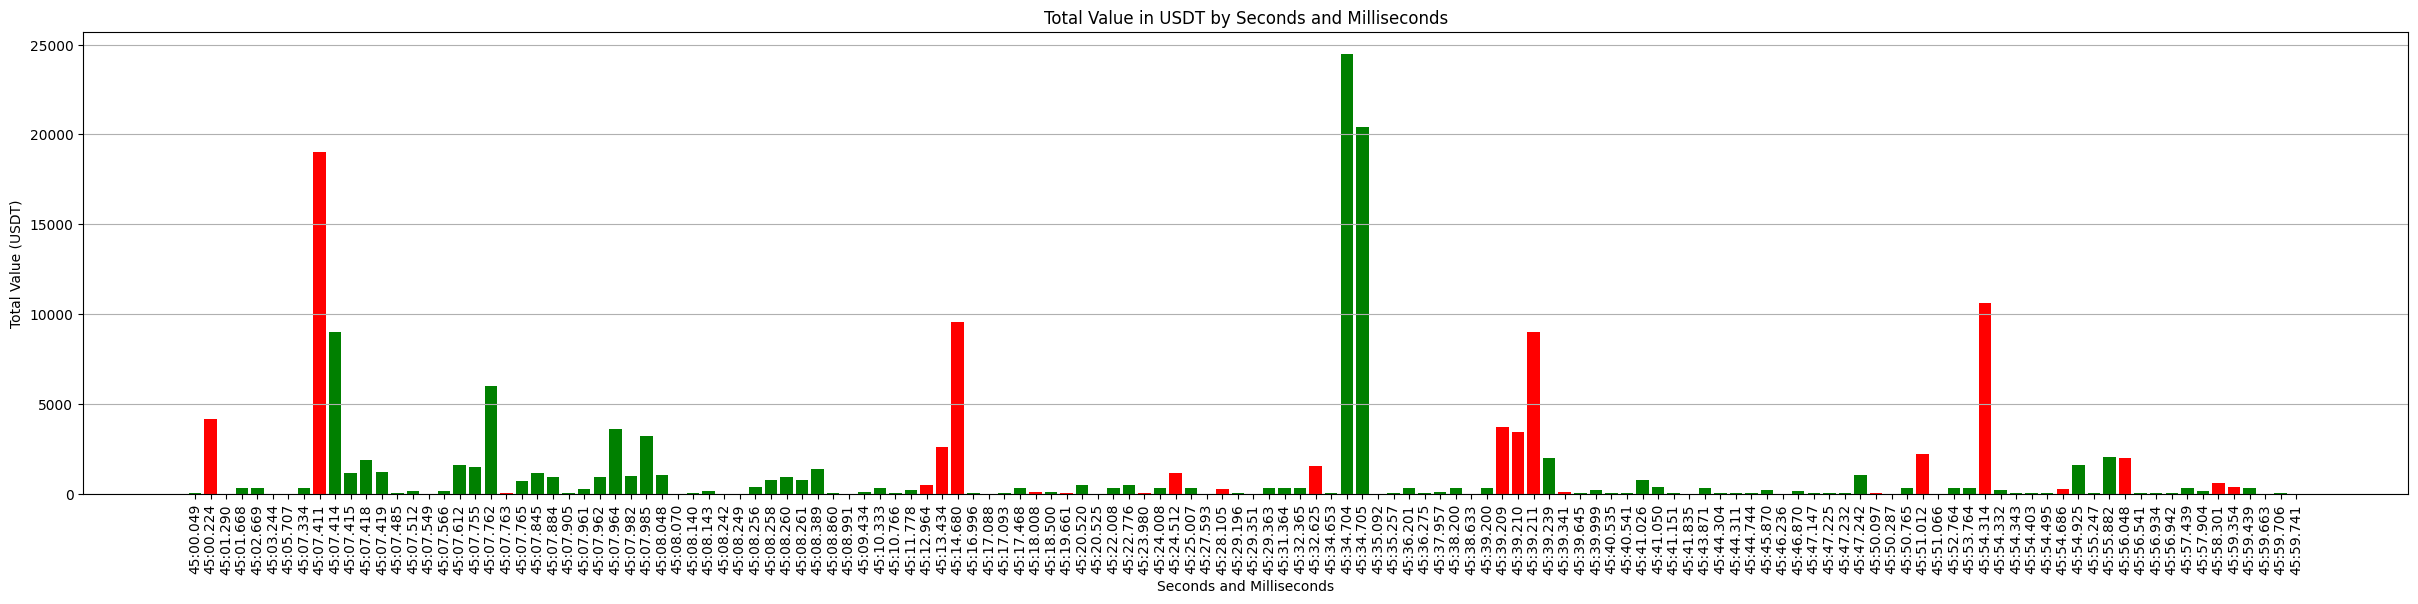

In [31]:
pd.reset_option('display.max_rows')

z['datetime'] = pd.to_datetime(z['datetime'])

# Extract seconds and milliseconds from the 'datetime' column
z['seconds_milliseconds'] = z['datetime'].dt.strftime('%M:%S.%f').str[:-3]   # Extracting seconds and milliseconds

# Determine colors based on buy/sell values
colors = ['green' if buy else 'red' for buy in z['buy']]

# Create a bar chart
plt.figure(figsize=(30, 6))
plt.bar(z['seconds_milliseconds'], z['total_value_usdt'], color=colors)

# Set y-axis limits
  # Limits set between 0 and 3000

# Adding titles and labels
plt.title('Total Value in USDT by Seconds and Milliseconds')
plt.xlabel('Seconds and Milliseconds')
plt.ylabel('Total Value (USDT)')

plt.xticks(rotation=90)

# Show grid lines
plt.grid(axis='y')

# Show the plot
plt.show()

In [32]:
z['price'] = z['price'] * 1e6

z.set_index('datetime', inplace=True)
z['time_interval'] = (z.index - z.index.floor('min')).total_seconds() // 15 * 15

z['total_buy'] = z['quantity'].where(z['buy'], 0)
z['total_sell'] = z['quantity'].where(z['sell'], 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\3436638517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['price'] = z['price'] * 1e6
C:\Users\HP\AppData\Local\Temp\ipykernel_10188\3436638517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['time_interval'] = (z.index - z.index.floor('min')).total_seconds() // 15 * 15
C:\Users\HP\AppData\Local\Temp\ipykernel_10188\3436638517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [33]:
z.head()

,buy,sell,quantity,price,trade_id,total_value_usdt,seconds_milliseconds,time_interval,total_buy,total_sell
datetime,,,,,,,,,,
2024-10-12 08:45:00.049,True,False,5992630.0,9.93,196487682,59.506816,45:00.049,0.0,5992630.0,0.0
2024-10-12 08:45:00.224,False,True,3000911.0,9.94,196487683,29.829055,45:00.224,0.0,0.0,3000911.0
2024-10-12 08:45:00.224,False,True,161439.0,9.94,196487684,1.604704,45:00.224,0.0,0.0,161439.0
2024-10-12 08:45:00.224,False,True,206185.0,9.94,196487685,2.049479,45:00.224,0.0,0.0,206185.0
2024-10-12 08:45:00.224,False,True,203252.0,9.94,196487686,2.020325,45:00.224,0.0,0.0,203252.0


In [34]:
grouped = z.groupby(['price', 'time_interval']).agg(
    total_buy_quantity=('total_buy', 'sum'),
    total_sell_quantity=('total_sell', 'sum')
).reset_index()

grouped

,price,time_interval,total_buy_quantity,total_sell_quantity
0,9.92,30.0,1.075359e+08,0.000000e+00
1,9.92,45.0,9.074088e+07,0.000000e+00
2,9.93,0.0,3.112457e+08,0.000000e+00
3,9.93,15.0,2.789975e+08,0.000000e+00
4,9.93,30.0,6.107568e+09,4.106342e+09
5,9.93,45.0,1.134086e+09,5.344874e+09
6,9.94,0.0,4.497089e+09,9.970241e+09
7,9.94,15.0,0.000000e+00,1.940970e+08
8,9.94,30.0,0.000000e+00,1.658790e+08
9,9.94,45.0,0.000000e+00,3.282793e+08


Factorizing (price, quantity, time)

In [35]:
grouped['total_volume'] = grouped['total_buy_quantity'] + grouped['total_sell_quantity']
# the reference price (midpoint or VWAP)
reference_price = grouped['price'].mean()  # You can use VWAP, midpoint, or another reference

# Quantity Factor
grouped['volume_factor'] = grouped['total_volume'] / grouped['total_volume'].sum()

# Price Factor (inverse distance from reference price)
grouped['price_factor'] = 1 / (1 + abs(grouped['price'] - reference_price))

# Time Factor (giving more weight to later trades)
total_time = 60  
grouped['time_factor'] = 1 + (grouped['time_interval'] / total_time)

# calculate the total weight
# You can adjust the relative weights of each factor if desired
grouped['total_weight'] = grouped['volume_factor'] * grouped['price_factor'] * grouped['time_factor']
grouped

,price,time_interval,total_buy_quantity,total_sell_quantity,total_volume,volume_factor,price_factor,time_factor,total_weight
0,9.92,30.0,1.075359e+08,0.000000e+00,1.075359e+08,0.003292,0.986547,1.50,0.004871
1,9.92,45.0,9.074088e+07,0.000000e+00,9.074088e+07,0.002777,0.986547,1.75,0.004795
2,9.93,0.0,3.112457e+08,0.000000e+00,3.112457e+08,0.009527,0.996377,1.00,0.009492
3,9.93,15.0,2.789975e+08,0.000000e+00,2.789975e+08,0.008540,0.996377,1.25,0.010636
4,9.93,30.0,6.107568e+09,4.106342e+09,1.021391e+10,0.312635,0.996377,1.50,0.467253
5,9.93,45.0,1.134086e+09,5.344874e+09,6.478960e+09,0.198313,0.996377,1.75,0.345790
6,9.94,0.0,4.497089e+09,9.970241e+09,1.446733e+10,0.442827,0.993677,1.00,0.440027
7,9.94,15.0,0.000000e+00,1.940970e+08,1.940970e+08,0.005941,0.993677,1.25,0.007379
8,9.94,30.0,0.000000e+00,1.658790e+08,1.658790e+08,0.005077,0.993677,1.50,0.007568
9,9.94,45.0,0.000000e+00,3.282793e+08,3.282793e+08,0.010048,0.993677,1.75,0.017473


Segragation of the total weights (buy, sell)

In [36]:
def segregate_weights(row):
    total_volume = row['total_buy_quantity'] + row['total_sell_quantity']
    
    # Case 1: No buy or sell volume
    if total_volume == 0:
        return pd.Series({'buy_weight': 0, 'sell_weight': 0})
    
    # Case 2: Only buy (no sell)
    elif row['total_sell_quantity'] == 0:
        return pd.Series({'buy_weight': row['total_weight'], 'sell_weight': 0})
    
    # Case 3: Only sell (no buy)
    elif row['total_buy_quantity'] == 0:
        return pd.Series({'buy_weight': 0, 'sell_weight': row['total_weight']})
    
    # Case 4: Both buy and sell (split weight proportionally)
    else:
        buy_weight = row['total_weight'] * (row['total_buy_quantity'] / total_volume)
        sell_weight = row['total_weight'] * (row['total_sell_quantity'] / total_volume)
        return pd.Series({'buy_weight': buy_weight, 'sell_weight': sell_weight})

# Apply the segregate_weights function
grouped[['buy_weight', 'sell_weight']] = grouped.apply(segregate_weights, axis=1)
grouped

,price,time_interval,total_buy_quantity,total_sell_quantity,total_volume,volume_factor,price_factor,time_factor,total_weight,buy_weight,sell_weight
0,9.92,30.0,1.075359e+08,0.000000e+00,1.075359e+08,0.003292,0.986547,1.50,0.004871,0.004871,0.000000
1,9.92,45.0,9.074088e+07,0.000000e+00,9.074088e+07,0.002777,0.986547,1.75,0.004795,0.004795,0.000000
2,9.93,0.0,3.112457e+08,0.000000e+00,3.112457e+08,0.009527,0.996377,1.00,0.009492,0.009492,0.000000
3,9.93,15.0,2.789975e+08,0.000000e+00,2.789975e+08,0.008540,0.996377,1.25,0.010636,0.010636,0.000000
4,9.93,30.0,6.107568e+09,4.106342e+09,1.021391e+10,0.312635,0.996377,1.50,0.467253,0.279402,0.187852
5,9.93,45.0,1.134086e+09,5.344874e+09,6.478960e+09,0.198313,0.996377,1.75,0.345790,0.060528,0.285263
6,9.94,0.0,4.497089e+09,9.970241e+09,1.446733e+10,0.442827,0.993677,1.00,0.440027,0.136780,0.303247
7,9.94,15.0,0.000000e+00,1.940970e+08,1.940970e+08,0.005941,0.993677,1.25,0.007379,0.000000,0.007379
8,9.94,30.0,0.000000e+00,1.658790e+08,1.658790e+08,0.005077,0.993677,1.50,0.007568,0.000000,0.007568
9,9.94,45.0,0.000000e+00,3.282793e+08,3.282793e+08,0.010048,0.993677,1.75,0.017473,0.000000,0.017473


Agregation of the weights (buy, sell)

In [37]:
total_buy_weight = grouped['buy_weight'].sum()
total_sell_weight = grouped['sell_weight'].sum()

# Step 3: Determine Final Volume Dominance Direction
if total_buy_weight > total_sell_weight:
    final_direction = 'Buy'
elif total_sell_weight > total_buy_weight:
    final_direction = 'Sell'
else:
    final_direction = 'Neutral'  # If they are equal or close enough

# Step 4: Dominance Strength (optional, to measure how strong the direction is)
dominance_ratio = max(total_buy_weight, total_sell_weight) / (total_buy_weight + total_sell_weight)

# Print the results
print(f"Total Buy Weight: {total_buy_weight}")
print(f"Total Sell Weight: {total_sell_weight}")
print(f"Final Direction: {final_direction}")
print(f"Dominance Ratio: {dominance_ratio:.2f}")

Total Buy Weight: 0.5065033703446482
Total Sell Weight: 0.8097882233150749
Final Direction: Sell
Dominance Ratio: 0.62


In [ ]:
grouped = z.groupby(['price', 'time_interval']).agg(
    total_buy_quantity=('total_buy', 'sum'),
    total_sell_quantity=('total_sell', 'sum')
).reset_index()

# Convert time_interval back to datetime
grouped['time_interval'] = pd.to_datetime(grouped['time_interval'], unit='ms', origin='unix')
grouped.set_index(['price', 'time_interval'], inplace=True)

# Fill missing values with zeros
grouped = grouped.fillna(0)

# Display the resulting DataFrame
print("Grouped DataFrame:")
grouped.head()

In [ ]:
unique_prices = z['price'].unique()
print("Unique Prices:", unique_prices)
time_intervals = z['time_interval'].unique()
print("Unique Time Intervals:", time_intervals)

In [ ]:
summary = z.groupby('price').agg(
    total_buy_quantity=('quantity', lambda x: x[z['buy']].sum()),
    total_sell_quantity=('quantity', lambda x: x[z['sell']].sum())
).reset_index()

summary['price'] = summary['price'].apply(lambda x: f"{x:.8f}")

summary